In [1]:
# -*- coding: utf-8 -*-
import Revise
import GLRenderer as GL
import Images as I
import MiniGSG as S
import Rotations as R
import PoseComposition: Pose, IDENTITY_POSE, IDENTITY_ORN
import InverseGraphics as T
import NearestNeighbors
import LightGraphs as LG
import Gen
try
    import MeshCatViz as V
catch
    import MeshCatViz as V    
end
import ImageView as IV

V.setup_visualizer()

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8700
└ @ MeshCat /home/dval/.julia/packages/MeshCat/oC0sL/src/visualizer.jl:73


Process(`xdg-open http://127.0.0.1:8700`, ProcessExited(0))

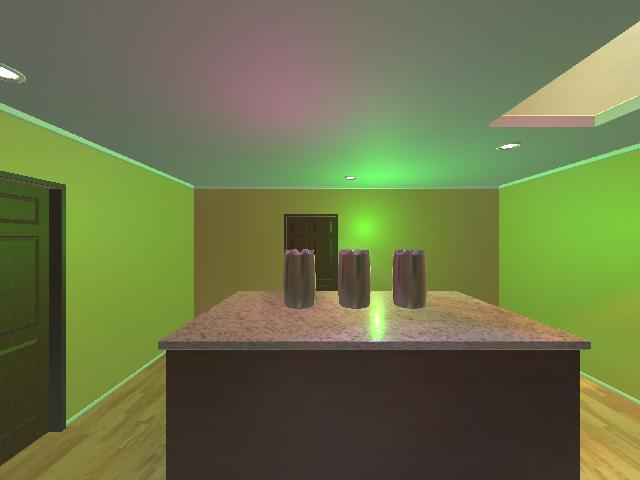

In [21]:
rgb_image = T.load_rgb("./data/new_test_data/frame_0.jpeg")
GL.view_rgb_image(rgb_image;in_255=true)

In [22]:
import PyCall
np = PyCall.pyimport("numpy")
depth_image = np.load("data/new_test_data/frame_0.npy")

480×640 Matrix{Float32}:
 0.920999  0.920999  0.920999  0.920999  …  0.920996  0.920996  0.920996
 0.924861  0.924861  0.924861  0.924861     0.924857  0.924857  0.924857
 0.928756  0.928756  0.928756  0.928756     0.928754  0.928754  0.928752
 0.932988  0.932988  0.932988  0.932988     0.932984  0.932984  0.932984
 0.93695   0.93695   0.93695   0.93695      0.936946  0.936946  0.936946
 0.940946  0.940946  0.940946  0.940946  …  0.940942  0.940942  0.940942
 0.944976  0.944976  0.944976  0.944976     0.944973  0.944973  0.944973
 0.94904   0.94904   0.94904   0.94904      0.949038  0.949038  0.949038
 0.953139  0.953139  0.953139  0.953139     0.953136  0.953136  0.953136
 0.957274  0.957274  0.957274  0.957274     0.957271  0.957271  0.957271
 0.961446  0.961446  0.961446  0.961446  …  0.961443  0.961443  0.961443
 0.965654  0.965654  0.965654  0.965654     0.965651  0.965651  0.965651
 0.969898  0.969898  0.969898  0.969898     0.969896  0.969896  0.969896
 ⋮                        

In [19]:
import PyCall
np = PyCall.pyimport("numpy")
depth_image = np.load("data/new_test_data/frame_0.npy")

480×640 Matrix{Float32}:
 0.920999  0.920999  0.920999  0.920999  …  0.920996  0.920996  0.920996
 0.924861  0.924861  0.924861  0.924861     0.924857  0.924857  0.924857
 0.928756  0.928756  0.928756  0.928756     0.928754  0.928754  0.928752
 0.932988  0.932988  0.932988  0.932988     0.932984  0.932984  0.932984
 0.93695   0.93695   0.93695   0.93695      0.936946  0.936946  0.936946
 0.940946  0.940946  0.940946  0.940946  …  0.940942  0.940942  0.940942
 0.944976  0.944976  0.944976  0.944976     0.944973  0.944973  0.944973
 0.94904   0.94904   0.94904   0.94904      0.949038  0.949038  0.949038
 0.953139  0.953139  0.953139  0.953139     0.953136  0.953136  0.953136
 0.957274  0.957274  0.957274  0.957274     0.957271  0.957271  0.957271
 0.961446  0.961446  0.961446  0.961446  …  0.961443  0.961443  0.961443
 0.965654  0.965654  0.965654  0.965654     0.965651  0.965651  0.965651
 0.969898  0.969898  0.969898  0.969898     0.969896  0.969896  0.969896
 ⋮                        

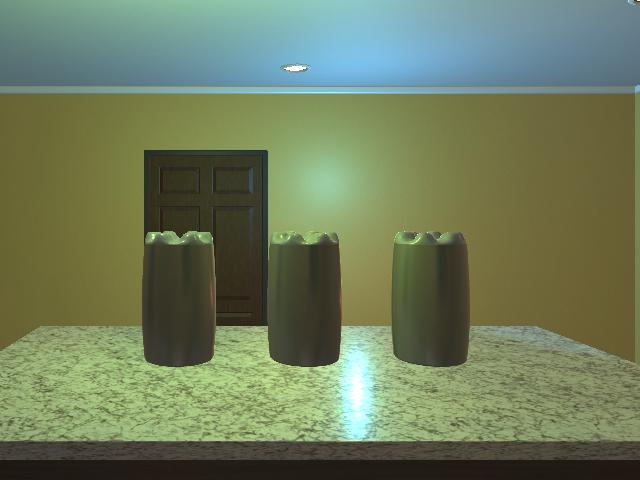

In [4]:
rgb_image = T.load_rgb("./data/3DP3 Toy Files/videos/1/frames/frame_0.jpeg")
GL.view_rgb_image(rgb_image;in_255=true)

In [5]:
import PyCall
np = PyCall.pyimport("numpy")
depth_image = np.load("data/3DP3 Toy Files/frame_0.npy")

300×300 Matrix{Float32}:
 0.787854  0.787854  0.787854  0.787854  …  0.787848  0.787848  0.787848
 0.793161  0.793161  0.793161  0.793161     0.793155  0.793155  0.793155
 0.798536  0.798536  0.798536  0.798536     0.798532  0.798532  0.798532
 0.803988  0.803988  0.803988  0.803988     0.803982  0.803982  0.803982
 0.809513  0.809513  0.809513  0.809513     0.809508  0.809508  0.809508
 0.815116  0.815116  0.815116  0.815116  …  0.815111  0.815111  0.815111
 0.820493  0.820493  0.820493  0.820493     0.820487  0.820487  0.820487
 0.826253  0.826253  0.826253  0.826253     0.826247  0.826247  0.826247
 0.832094  0.832094  0.832094  0.832094     0.832088  0.832088  0.832088
 0.838018  0.838018  0.838018  0.838018     0.838012  0.838012  0.838012
 0.844027  0.844027  0.844027  0.844027  …  0.844021  0.844021  0.844021
 0.850124  0.850124  0.850124  0.850124     0.850118  0.850118  0.850118
 0.856614  0.856614  0.856614  0.856613     0.856607  0.856607  0.856607
 ⋮                        

In [23]:
function CameraIntrinsics(width, height, fov_y_deg)
    aspect_ratio = width / height

    # Camera principal point is the center of the image.
    cx, cy = width / 2.0, height / 2.0

    # Vertical field of view is given.
    fov_y = deg2rad(fov_y_deg)
    # Convert field of view to distance to scale by aspect ratio and
    # convert back to radians to recover the horizontal field of view.
    fov_x = 2 * atan(aspect_ratio * tan(fov_y / 2.0))

    # Use the following relation to recover the focal length:
    #   FOV = 2 * atan( (0.5 * IMAGE_PLANE_SIZE) / FOCAL_LENGTH )
    fx = cx / tan(fov_x / 2.0)
    fy = cy / tan(fov_y / 2.0)

    clipping_near, clipping_far = 0.01, 100000.0

    GL.CameraIntrinsics(width, height,
        fx, fy, cx, cy,
        clipping_near, clipping_far)
end


CameraIntrinsics (generic function with 1 method)

In [26]:
depth_image

480×640 Matrix{Float32}:
 0.920999  0.920999  0.920999  0.920999  …  0.920996  0.920996  0.920996
 0.924861  0.924861  0.924861  0.924861     0.924857  0.924857  0.924857
 0.928756  0.928756  0.928756  0.928756     0.928754  0.928754  0.928752
 0.932988  0.932988  0.932988  0.932988     0.932984  0.932984  0.932984
 0.93695   0.93695   0.93695   0.93695      0.936946  0.936946  0.936946
 0.940946  0.940946  0.940946  0.940946  …  0.940942  0.940942  0.940942
 0.944976  0.944976  0.944976  0.944976     0.944973  0.944973  0.944973
 0.94904   0.94904   0.94904   0.94904      0.949038  0.949038  0.949038
 0.953139  0.953139  0.953139  0.953139     0.953136  0.953136  0.953136
 0.957274  0.957274  0.957274  0.957274     0.957271  0.957271  0.957271
 0.961446  0.961446  0.961446  0.961446  …  0.961443  0.961443  0.961443
 0.965654  0.965654  0.965654  0.965654     0.965651  0.965651  0.965651
 0.969898  0.969898  0.969898  0.969898     0.969896  0.969896  0.969896
 ⋮                        

In [31]:
intrinsics = CameraIntrinsics(size(depth_image,2),size(depth_image,1), 110)


GLRenderer.CameraIntrinsics
  width: Int64 640
  height: Int64 480
  fx: Float64 168.04980917033038
  fy: Float64 168.04980917033035
  cx: Float64 320.0
  cy: Float64 240.0
  near: Float64 0.01
  far: Float64 100000.0


In [32]:
point_cloud = GL.depth_image_to_point_cloud(depth_image, intrinsics)

3×307200 Matrix{Float64}:
 -1.75102   -1.75837   -1.76577   …  3.02546  3.01273  3.00009  2.98757
 -1.31258   -1.31258   -1.31258      2.23951  2.23951  2.23951  2.23951
  0.920999   0.924861   0.928756     1.59133  1.58463  1.57798  1.57139

In [33]:
V.viz(point_cloud)

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [34]:
size(point_cloud)

(3, 307200)

# trying to manually crop the table region

In [35]:
point_cloud

3×307200 Matrix{Float64}:
 -1.75102   -1.75837   -1.76577   …  3.02546  3.01273  3.00009  2.98757
 -1.31258   -1.31258   -1.31258      2.23951  2.23951  2.23951  2.23951
  0.920999   0.924861   0.928756     1.59133  1.58463  1.57798  1.57139

In [36]:
test_point_cloud = point_cloud[:, [i for i in 1: size(point_cloud)[2] if -1.2<point_cloud[1,i]<1.2]] 

3×120756 Matrix{Float64}:
 -1.19749   -1.19201   -1.19701   …   1.19201    1.19701    1.19749
 -1.31258   -1.31258   -1.31258      -1.31258   -1.31258   -1.31258
  0.920999   0.920999   0.924861      0.920996   0.924858   0.920996

In [37]:
V.viz(test_point_cloud)

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [38]:
test_point_cloud = test_point_cloud[:, [i for i in 1: size(test_point_cloud)[2] if 0.7>test_point_cloud[2,i]>0.1]] 

3×19590 Matrix{Float64}:
 -1.07926   -1.07862  -1.07862   -1.07862   …  1.19883  1.19883   1.19883
  0.678294   0.68457   0.691249   0.697928     0.68457  0.691249  0.697928
  1.12303    1.12236   1.12236    1.12236      1.12236  1.12236   1.12236

In [39]:
V.viz(test_point_cloud)

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [40]:
table_plus_contents_pc = test_point_cloud

3×19590 Matrix{Float64}:
 -1.07926   -1.07862  -1.07862   -1.07862   …  1.19883  1.19883   1.19883
  0.678294   0.68457   0.691249   0.697928     0.68457  0.691249  0.697928
  1.12303    1.12236   1.12236    1.12236      1.12236  1.12236   1.12236

## Get table equation

In [41]:
table_eq = T.find_table_plane(table_plus_contents_pc) # description of table

4-element Vector{Float64}:
  0.053100045007845854
  0.9982952821419296
  0.024226326038624003
 -0.6816228288177202

In [56]:
inliers, mask = T.find_plane_inliers(table_plus_contents_pc, table_eq; threshold = 0.1); 
# Mask: which columns correspond to the y position of the objects
# Inliers: the objects (point cloud of the object)

In [57]:
inliers

3×14287 Matrix{Float64}:
 -1.07926   -1.07862  -1.07862   -1.07862   …  1.19954   1.19883  1.19883
  0.678294   0.68457   0.691249   0.697928     0.678294  0.68457  0.691249
  1.12303    1.12236   1.12236    1.12236      1.12303   1.12236  1.12236

In [58]:
V.viz(inliers)

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [118]:
# crop_point_cloud = table_plus_contents_pc[:,[i for i in 1:length(mask) if mask[i]]]

3×6763 Matrix{Float64}:
 -1.19149   -1.19149   -1.19149   -1.19149   …  1.19149   1.19149   1.1936
  0.582386   0.593072   0.603758   0.614444     0.603758  0.614444  0.626237
  1.12236    1.12236    1.12236    1.12236      1.12236   1.12236   1.12435

In [119]:
# V.viz(crop_point_cloud)

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [120]:
# # get the max and min of the table and only get things above the max coordinates
# max1, max2, max3 = maximum(inliers[1,:]), maximum(inliers[2,:]), maximum(inliers[3,:])
# min1, min2, min3 = minimum(inliers[1,:]), minimum(inliers[2,:]), minimum(inliers[3,:])

In [121]:
# remove_table_point_cloud = point_cloud[:, [i for i in 1:length(size(point_cloud)[2]) if (max1>=point_cloud[1,i]>=min1
#     && max2>=point_cloud[2,i]>=min2 && max3>=point_cloud[3,i]>=min3)]]

In [59]:
just_objects_point_cloud =  table_plus_contents_pc[:,[i for i in 1:length(mask) if mask[i]==0]]
# this takes objects that are not in the table (mask defines where the table is)

3×5303 Matrix{Float64}:
 -1.19578   -1.19578   -1.19578   -1.19578   …  1.18548   1.19215   1.19883
  0.108707   0.132864   0.157021   0.181179     0.697928  0.697928  0.697928
  4.0596     4.0596     4.0596     4.0596       1.12236   1.12236   1.12236

In [60]:
V.viz(just_objects_point_cloud)

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [65]:
entities = T.get_entities_from_assignment(just_objects_point_cloud, T.dbscan_cluster(just_objects_point_cloud; radius=0.05))

10-element Vector{Matrix{Float64}}:
 [-1.1957785617143215 -1.1957785617143215 … 0.3786750707916268 0.3786750707916268; 0.10870714197402924 0.13286428463492464 … 0.427536370248611 0.4519670199771031; 4.059603214263916 4.059603214263916 … 4.105566024780273 4.105566024780273]
 [-0.37147902985683373 -0.37103591483999604 … -0.046522131048762926 -0.04657660205929973; 0.29005896851834967 0.29987834213095577 … 0.4910669388480532 0.5019922666391194; 1.710328221321106 1.7082880735397339 … 1.7373411655426025 1.739375352859497]
 [-0.2839377234473474 -0.27224307172706874 … -0.2281632530818072 -0.218473426170792; 0.1017889951981057 0.10142388946694719 … 0.1326530541173298 0.13321550376267807; 1.8005917072296143 1.794133186340332 … 1.7833856344223022 1.7909471988677979]
 [-0.10985772396171596 -0.08541817165492734 … 0.3786750707916268 0.3786750707916268; 0.6957655850908678 0.6955479691901227 … 0.6718428675335316 0.6962735172620237; 4.1025710105896 4.101287841796875 … 4.105566024780273 4.10556602478027

In [66]:
V.viz(entities[1])

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [67]:
V.viz(entities[2])

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [144]:
V.viz(entities[3])

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700

In [64]:
V.viz(entities[4])

LoadError: BoundsError: attempt to access 3-element Vector{Matrix{Float64}} at index [4]

In [135]:
V.viz(entities[5])

MeshCat Visualizer with path /meshcat/cloud1 at http://127.0.0.1:8700